<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [ ]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [ ]:
# from js import fetch
# import io

# URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
# resp = await fetch(URL)
# boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [11]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(URL)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 1: Become familiar with the dataset

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [14]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [15]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [16]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Task 2: Generate Descriptive Statistics and Visualizations

#### 2.1 For the "Median value of owner-occupied homes" provide a boxplot

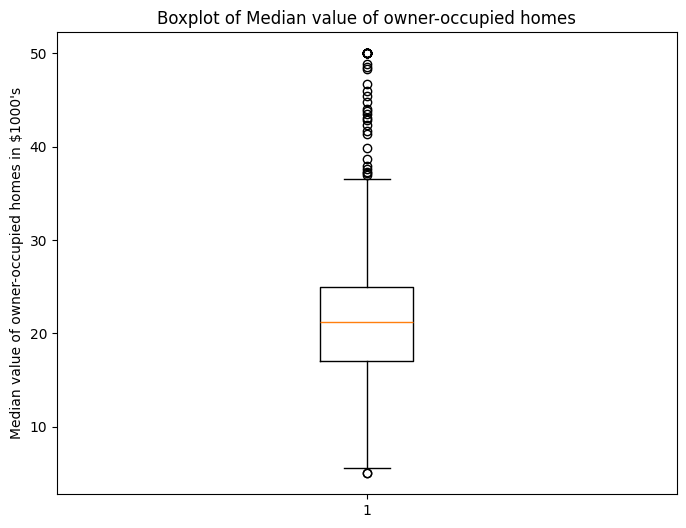

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(boston_df['MEDV'])
plt.title('Boxplot of Median value of owner-occupied homes')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show()

From the Median value of owner-occupied homes plot, the middle 50% of the data is in range of around 18-24. And there are a lot of outlier above max of the data of around 37. 

#### 2.2 Provide a  bar plot for the Charles river variable

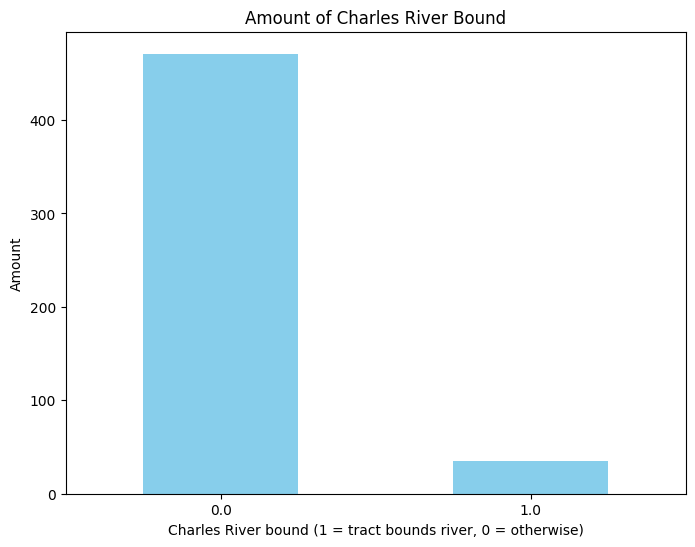

In [24]:
charles_river_counts = boston_df['CHAS'].value_counts()
plt.figure(figsize=(8, 6))
charles_river_counts.plot(kind='bar', color='skyblue')
plt.title('Amount of Charles River Bound')
plt.xlabel('Charles River bound (1 = tract bounds river, 0 = otherwise)')
plt.ylabel('Amount')
plt.xticks(rotation=0) 
plt.show()

From the bar plot, it shows the amount of Charles river bound, the amount of bounded river is quite higher comparing to not bound. 

#### 2.3 Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

<Figure size 1000x600 with 0 Axes>

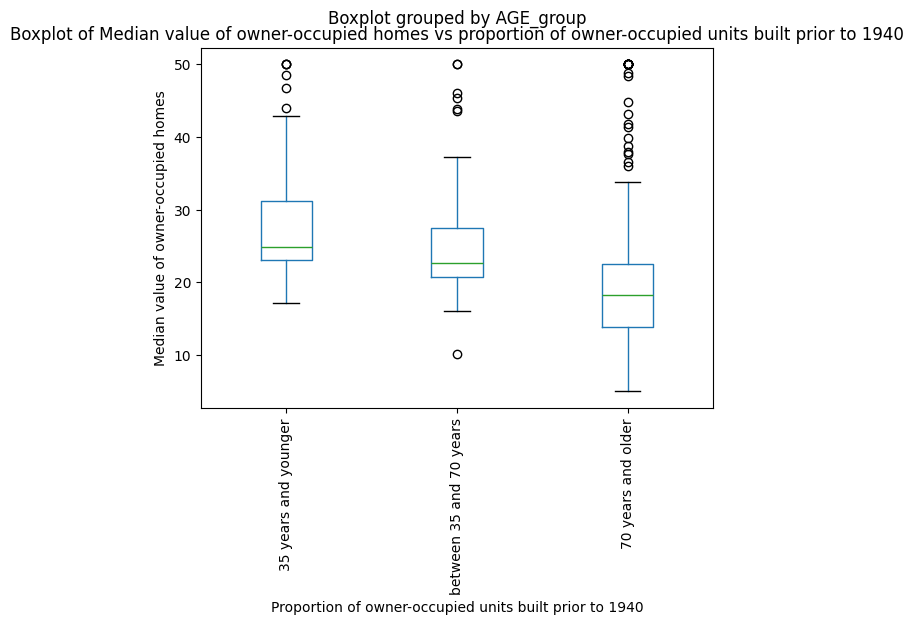

In [27]:
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

plt.figure(figsize=(10, 6))
boston_df.boxplot(column='MEDV', by='AGE_group', grid=False)
plt.title('Boxplot of Median value of owner-occupied homes vs proportion of owner-occupied units built prior to 1940')
plt.xlabel('Proportion of owner-occupied units built prior to 1940')
plt.ylabel('Median value of owner-occupied homes')
plt.xticks(rotation=90) 
plt.show()

This boxplot displays the distribution of median value of owner-occupied homes vs proportion of owner-occupied units built prior to 1940 (split into 3 group). There are quite an outlier above max value of the box similiar to what we have seen on the first plot. Notice that the group of 70+ year seem to have a lower of median value of owner-occupied homes. 

#### 2.4 Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

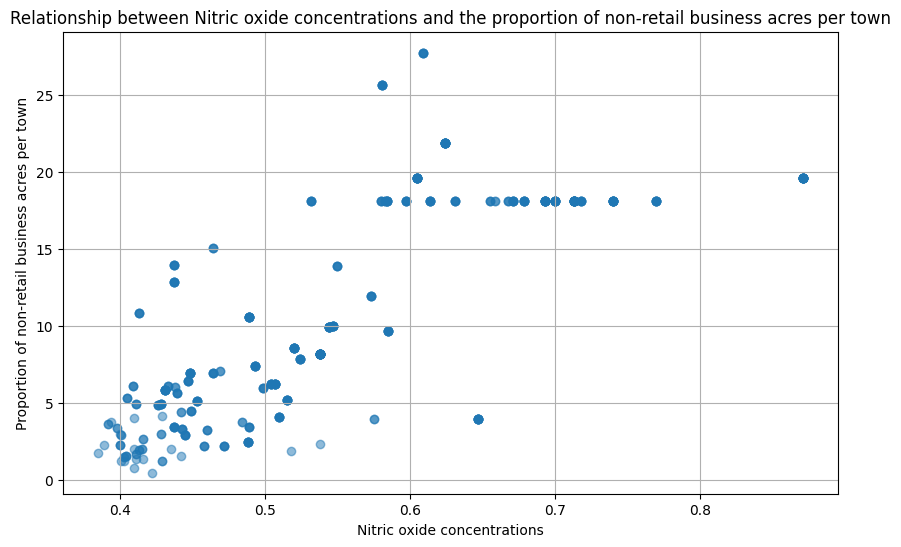

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(boston_df['NOX'], boston_df['INDUS'], alpha=0.5)
plt.title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
plt.xlabel('Nitric oxide concentrations')
plt.ylabel('Proportion of non-retail business acres per town')
plt.grid(True)
plt.show()

This scatter plot shows the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. It shows a positive correlation when the Nitric oxide is less than 0.6. Then, the proportion of non-retail business acres per town remains at around 18 although the Nitric oxide is increasing.

#### 2.5 Create a histogram for the pupil to teacher ratio variable

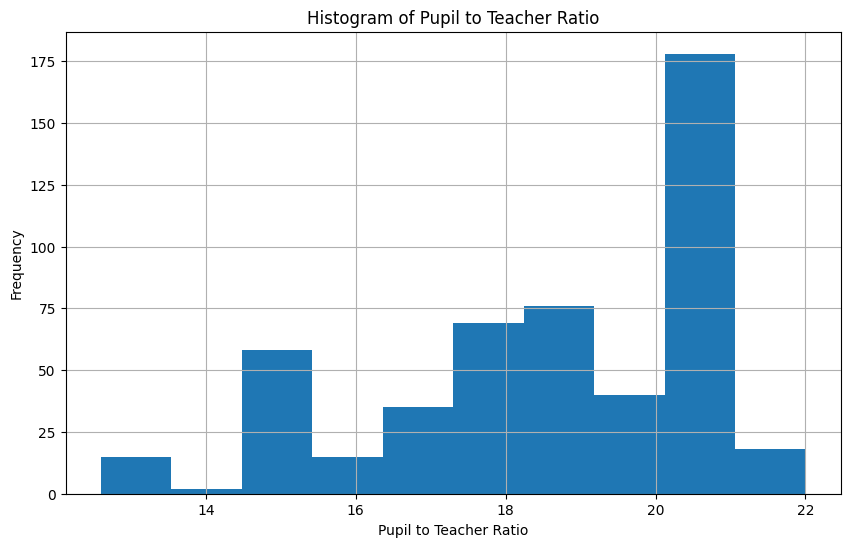

In [36]:
plt.figure(figsize=(10, 6))
plt.hist(boston_df['PTRATIO'])
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

This histogram displays the distribution of pupil to teacher ratio. It shows the frequency of different pupil to teacher ratio values. The highest frequency seem to occur for the pupil to teacher ratio around 20. 

## Task 3: Use the appropriate tests to answer the questions provided.
For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

#### 3.1 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Hypothesis

Null Hypothesis (H0): There is no significant difference in median value of houses bounded by the Charles river and houses that aren't bound.

Alternative Hypothesis (Ha): There is significant difference in median value of houses bounded by the Charles river and houses that aren't bound.

In [38]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'])
print(f"{t_statistic=}\n{p_value=}")

t_statistic=3.996437466090509
p_value=7.390623170519905e-05


p_value < 0.05 - Reject the null hypothesis. There is significant difference in median value of houses bounded by the Charles river and houses that aren't bound.

#### 3.2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypothesis

Null Hypothesis (H0): There is no significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

Alternative Hypothesis (Ha): There is significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

In [43]:
from scipy.stats import f_oneway

f_statistic, p_value = f_oneway(boston_df[boston_df['AGE'] <= 35]['MEDV'],
                                 boston_df[(boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70)]['MEDV'],
                                 boston_df[boston_df['AGE'] > 70]['MEDV'])
print(f"{f_statistic=}\n{p_value=}")

f_statistic=36.40764999196599
p_value=1.7105011022702984e-15


P value < 0.05 - Reject the null hypothesis. There is a significant difference in median values of houses for each proportion of owner occupied units built prior to 1940 (AGE).

#### 3.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Hypothesis

Null Hypothesis (H0): There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

Alternative Hypothesis (Ha): There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [45]:
from scipy.stats import pearsonr

corr_coef, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"{corr_coef=}\n{p_value=}")

corr_coef=0.7636514469209154
p_value=7.913361061239591e-98


P value < 0.05 - Reject the null hypothesis. There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

#### 3.4 What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Hypothesis 

Null Hypothesis (H0): There is no significant impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

Alternative Hypothesis (Ha): There is a significant impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes



In [50]:
import statsmodels.api as sm

X = boston_df['DIS']
X = sm.add_constant(X)
y = boston_df['MEDV']
model = sm.OLS(y, X).fit()

print("Test Statistics:")
print(model.summary())
print(f"\n{model.pvalues['DIS']=}")



Test Statistics:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        16:22:38   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817   

P value < 0.05 - Reject the null hypothesis. There is a significant impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.